In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

## Carga de datos

In [2]:
df = pd.read_csv("C:/Users/agust/Desktop/project portfolio/myprojects/DECISION TREES/CLASSIFIER/datasets/spambase.data", names=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total","target"])
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Exploración y limpieza de datos

In [3]:
df.isnull().sum().sum()

np.int64(0)

In [4]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


df.info()

## Preprocesamiento de datos

In [19]:
# split
X = df.iloc[:, df.columns != 'target']
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Busqueda de hiperpamatros optimos
model = DecisionTreeClassifier()
param_grid = {"min_samples_split":range(2,10,2),
              "min_samples_leaf" : range(1,11)}
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid)

## Modelado

In [21]:
# entrenamiento
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 10, 2)})

In [22]:
# Mejores parametros para con sus score:
print(f"Mejor score accuracy : {gs.best_score_} con {gs.best_params_}")

Mejor score accuracy : 0.9122282608695652 con {'min_samples_leaf': 1, 'min_samples_split': 4}


In [23]:
# Mejor estimador
best_model = gs.best_estimator_

## VISUALIZACIÓN DE RESULTADOS

### Curva ROC

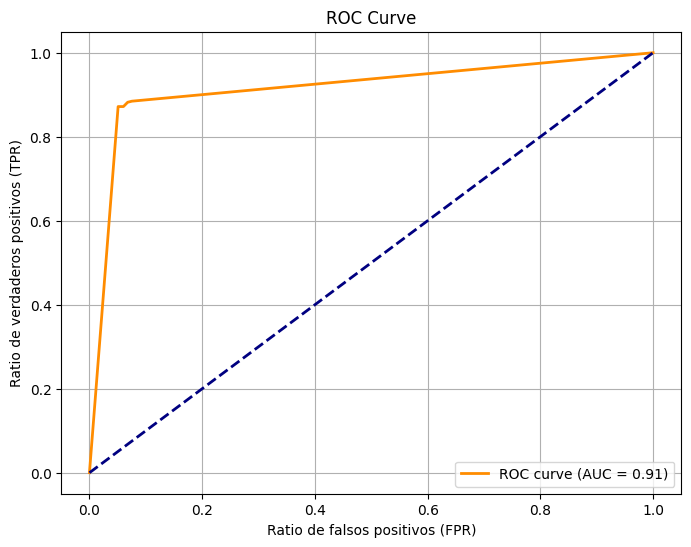

In [24]:
# Prob. para clases positivas
y_prob = best_model.predict_proba(X_test)[:, 1]

# 5. Calcular métricas para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 6. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Ratio de falsos positivos (FPR)')
plt.ylabel('Ratio de verdaderos positivos (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Matriz de confusión

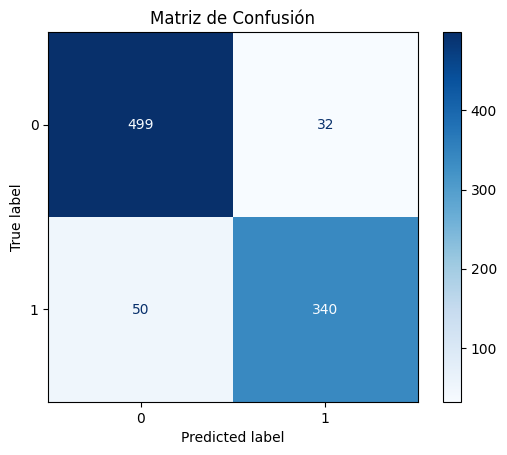

In [25]:
# predicciones
y_pred = best_model.predict(X_test)

# matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.grid(False)
plt.show()

[Text(0.6915896487985213, 0.9827586206896551, 'x[51] <= 0.08\ngini = 0.479\nsamples = 3680\nvalue = [2214, 1466]'),
 Text(0.4871534195933457, 0.9482758620689655, 'x[6] <= 0.02\ngini = 0.258\nsamples = 2120\nvalue = [1797, 323]'),
 Text(0.5893715341959335, 0.9655172413793103, 'True  '),
 Text(0.41497227356746763, 0.9137931034482759, 'x[52] <= 0.087\ngini = 0.178\nsamples = 1963\nvalue = [1769, 194]'),
 Text(0.3386321626617375, 0.8793103448275862, 'x[15] <= 0.105\ngini = 0.134\nsamples = 1860\nvalue = [1726, 134]'),
 Text(0.2510166358595194, 0.8448275862068966, 'x[21] <= 0.155\ngini = 0.094\nsamples = 1696\nvalue = [1612, 84]'),
 Text(0.23031423290203326, 0.8103448275862069, 'x[22] <= 0.325\ngini = 0.085\nsamples = 1676\nvalue = [1601, 75]'),
 Text(0.21848428835489833, 0.7758620689655172, 'x[26] <= 0.005\ngini = 0.082\nsamples = 1668\nvalue = [1597, 71]'),
 Text(0.21256931608133087, 0.7413793103448276, 'x[55] <= 25.5\ngini = 0.112\nsamples = 1190\nvalue = [1119, 71]'),
 Text(0.1585951940

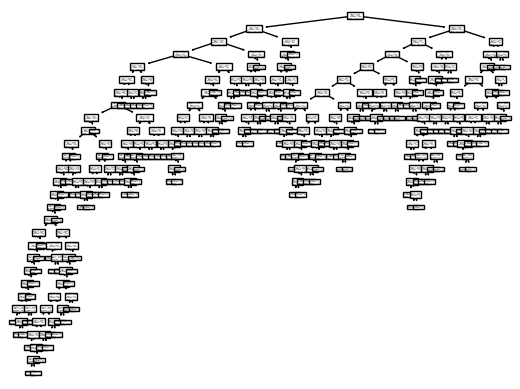

In [12]:
tree.plot_tree(best_model)